In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly_express as px
from importlib import reload

In [2]:
NOTEBOOK_DIR = os.getcwd()

### Simple Linear Regression

In [91]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

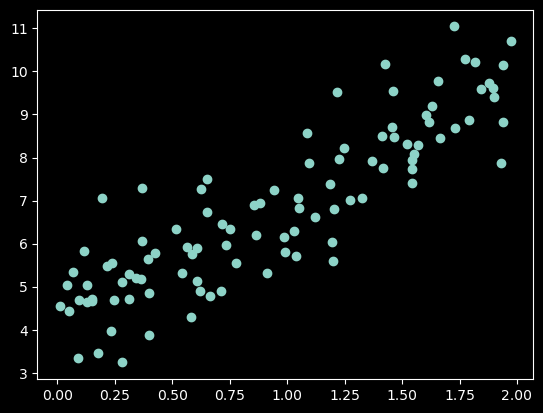

In [6]:
plt.scatter(X, y);

In [10]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y; theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([0, 2]).reshape(2,1)
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best; y_predict

array([[4.21509616],
       [9.75532293]])

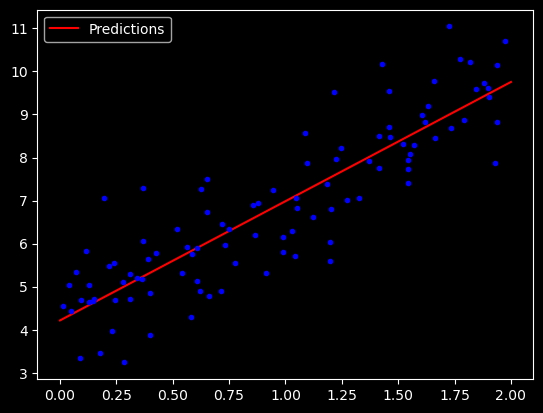

In [16]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.legend()
plt.plot(X, y, "b.");

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### SGD (linear)


In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,
                       eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel());

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Polynomial regression

In [93]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

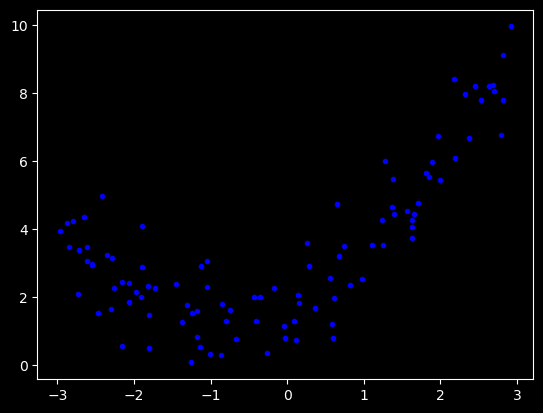

In [39]:
plt.plot(X, y, "b.");
# plt.grid(color="grey");

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [44]:
X[0]

array([-0.75275929])

In [43]:
X_poly[0]
# Contains both xi and xi^2

array([-0.75275929,  0.56664654])

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

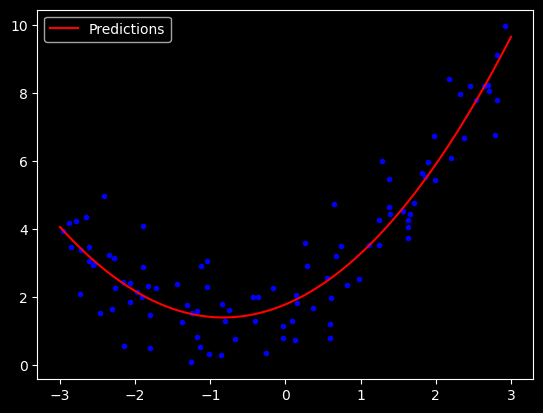

In [61]:
plt.plot(X, y, "b.");


X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# plt.plot(X, (X_poly * lin_reg.coef_ )+ lin_reg.intercept_, "r.", label="Predictions")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.legend()


### Training curves

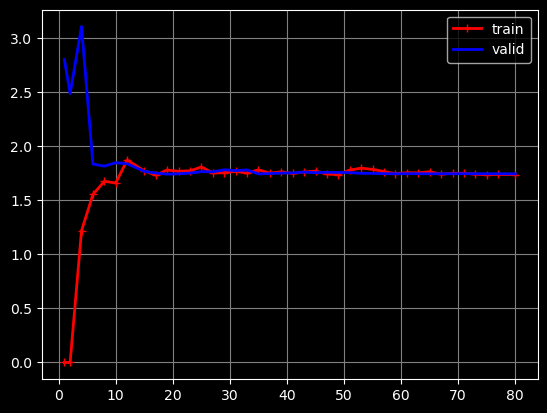

In [69]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid");
plt.grid(color="grey")
plt.legend();
# underfitting

In [72]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                                      LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression,
                                                        X, y, train_sizes=np.linspace(0.01, 1, 40),
                                                        cv=5, scoring="neg_root_mean_squared_error")

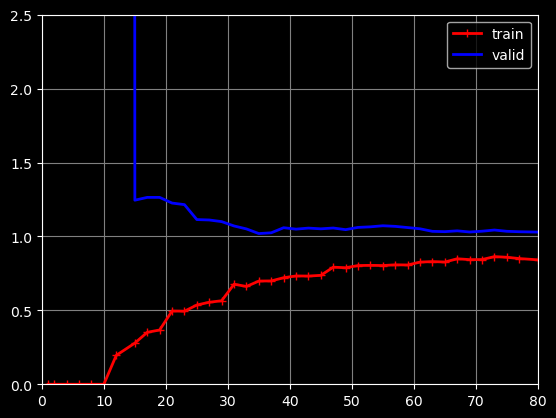

In [82]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.axis([0, 80, 0, 2.5])
plt.grid(color="grey")
plt.legend();
# overfitting

### Ridge regression

In [94]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [100]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None,
                        max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

Also can use RidgeCV.<br>
LassoCV and ElasticNetCV also exist.

In [101]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# Can also use SGDRegressor(penalty="l1", alpha=0.1)

array([4.77621741])

In [102]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])